In [2]:
import math
from time import time

import numpy as np

In [135]:
data = np.loadtxt('./SPECTF.dat', delimiter=',')

In [136]:
x_data = data[:, 1:]
y_data = np.array([data[:, 0]]).T

In [137]:
x_data[:2], y_data[:2]

(array([[ 59.,  52.,  70.,  67.,  73.,  66.,  72.,  61.,  58.,  52.,  72.,
          71.,  70.,  77.,  66.,  65.,  67.,  55.,  61.,  57.,  68.,  66.,
          72.,  74.,  63.,  64.,  56.,  54.,  67.,  54.,  76.,  74.,  65.,
          67.,  66.,  56.,  62.,  56.,  72.,  62.,  74.,  74.,  64.,  67.],
        [ 72.,  62.,  69.,  67.,  78.,  82.,  74.,  65.,  69.,  63.,  70.,
          70.,  72.,  74.,  70.,  71.,  72.,  75.,  66.,  65.,  73.,  78.,
          74.,  79.,  74.,  69.,  69.,  70.,  71.,  69.,  72.,  70.,  62.,
          65.,  65.,  71.,  63.,  60.,  69.,  73.,  67.,  71.,  56.,  58.]]),
 array([[ 1.],
        [ 1.]]))

In [138]:
x_data.shape

(267, 44)

In [139]:
np.sum(y_data, axis=0)

array([ 212.])

In [140]:
means = np.mean(x_data, axis=0)
maxs = np.max(x_data, axis=0)
mins = np.min(x_data, axis=0)

In [141]:
def normalize():
    for i in range(len(means)):
        x_data[:, i] = (x_data[:, i] - means[i]) / (maxs[i] - mins[i])

In [142]:
# maybe we should normalize to get better score
normalize()

In [143]:
# stds = np.std(x_data, axis=0)
# stds

In [144]:
# for i in range(len(stds)):
#     x_data[:, i] = x_data[:, i] / stds[i]

In [145]:
x_data[:2]

array([[-0.11972534, -0.21523096,  0.03004767, -0.04157303,  0.13440167,
         0.03177669,  0.02861657, -0.13316687, -0.08147508, -0.18271803,
         0.02332798,  0.01187801,  0.06024384,  0.18546528,  0.08378416,
         0.07501493, -0.00248067, -0.15969621, -0.10391422, -0.12219101,
        -0.12067416, -0.13873962,  0.07950588,  0.1337008 ,  0.07440326,
         0.10795627, -0.10179983, -0.11311947,  0.08324821, -0.09062615,
         0.12313876,  0.04164794,  0.0821677 ,  0.08988764,  0.03609712,
        -0.10287921, -0.06908917, -0.13440167,  0.08468581, -0.02736579,
         0.15015322,  0.18117353,  0.16083769,  0.23861478],
       [ 0.09694132, -0.04856429,  0.00732039, -0.04157303,  0.21636888,
         0.28177669,  0.05986657, -0.06967481,  0.08775569,  0.01371054,
        -0.00524345, -0.0024077 ,  0.10279704,  0.12777298,  0.15785823,
         0.16197145,  0.0624544 ,  0.11808156, -0.00587501,  0.00280899,
        -0.02067416,  0.12212995,  0.1145936 ,  0.22804042,  0.

In [16]:
'''

We have a dataset of 267 samples which have 44 features. Our labels are either 0 or 1.
The task is to classify given samples. The 80% of data is 1 labeled the 20% is 0.

'''

'\n\nWe have a dataset of 267 samples which have 44 features. Our labels are either 0 or 1.\nThe task is to classify given samples. The 80% of data is 1 labeled the 20% is 0.\n\n'

In [146]:
from random_forest import RandomForest
from logistic_regression import gradient_descent, sigmoid

In [147]:
def prepare_data(x_data, y_data, ratio=0.9):
    seed = int(math.floor(time() / 150))
    idx = np.arange(np.size(x_data, axis=0))
    np.random.seed(seed)
    np.random.shuffle(idx)
    x_data = x_data[idx]
    y_data = y_data[idx]

    train_part = np.int(ratio * np.size(x_data, axis=0))
    x_train = x_data[1:train_part, :]
    x_test = x_data[train_part:, :]
    y_train = y_data[1:train_part, :]
    y_test = y_data[train_part:, :]
    return x_train, y_train, x_test, y_test

In [148]:
def prepare_data_lr(x_data, y_data, ratio=0.9):
    x_train, y_train, x_test, y_test = prepare_data(x_data, y_data, ratio=ratio)
    xtrainlr = np.concatenate((np.ones(shape=(1, np.shape(x_train)[0])).T, x_train), axis=1)
    xtestlr = np.concatenate((np.ones(shape=(1, np.shape(x_test)[0])).T, x_test), axis=1)

    ytr = 2 * y_train - 1
    yts = 2 * y_test - 1
    return xtrainlr, ytr, xtestlr, yts

In [166]:
def accuracy_score(y_true, y_predict):
    """

    :param y_true: true labels of given data
    :param y_predict: predicted labels of given data
    :return:
    """
    y_true = y_true.flatten()
    y_predict = y_predict.astype(float).flatten()
    t_sum = sum([1. if np.abs(y_true[i] - y_predict[i]) < 0.5 else 0. for i in range(0, np.size(y_true))])
    return t_sum / np.size(y_true)

In [170]:
def launch_rf():
    '''
    Function that combines training, testing and returns the accuracy score
    '''
    x_train_rf, y_train_rf, x_test_rf, y_test_rf = prepare_data(x_data, y_data)
    random_forest = RandomForest(20, 10, 0.3)
    random_forest.fit(x_train_rf, y_train_rf)
    predict_rf = random_forest.predict(y_train_rf)
    score = accuracy_score(y_test_rf, predict_rf)
    return score, random_forest

In [161]:
x_train_rf, y_train_rf, x_test_rf, y_test_rf = prepare_data(x_data, y_data)
random_forest = RandomForest(20, 10, 0.3)
random_forest.fit(x_train_rf, y_train_rf)

In [162]:
predict_rf = random_forest.predict(y_train_rf)
predict_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [168]:
accuracy_score(y_test_rf, predict_rf)

0.7777777777777778

In [180]:
def launch_lr():
    '''
    Function that combines training, testing and returns the accuracy score
    '''
    x_train_lr, y_train_lr, x_test_lr, y_test_lr = prepare_data_lr(x_data, y_data)
    beta = gradient_descent(x_train_lr, y_train_lr, max_steps=500, step_size=0.3)
    beta = np.reshape(beta, (1, np.size(beta))).T
    predict_lr = sigmoid(x_test_lr.dot(beta)) * 2 - 1
    score = accuracy_score(y_test_lr, predict_lr)
    return score, beta

In [164]:
x_train_lr, y_train_lr, x_test_lr, y_test_lr = prepare_data_lr(x_data, y_data)
beta = gradient_descent(x_train_lr, y_train_lr, max_steps=500, step_size=0.3)
beta = np.reshape(beta, (1, np.size(beta))).T

In [165]:
predict_lr = sigmoid(x_test_lr.dot(beta)) * 2 - 1
predict_lr

array([[ 1.        ],
       [ 1.        ],
       [-1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [-1.        ],
       [ 1.        ],
       [-1.        ],
       [ 0.99999912],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ],
       [-1.        ],
       [-1.        ],
       [ 1.        ],
       [-1.        ],
       [-1.        ],
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]])

In [167]:
accuracy_score(y_test_lr, predict_lr)

0.5185185185185185

In [183]:
as_rf, as_lr = [], []
for _ in range(10):
    rf, _ = launch_rf()
    lr, _ = launch_lr()
    as_rf.append(rf)
    as_lr.append(lr)

In [185]:
import matplotlib.pyplot as plt

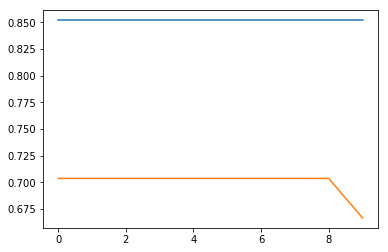

In [187]:
plt.plot(as_rf)
plt.plot(as_lr)
plt.show()